"Grupo 2"

- Aaban Vasconcelos Zyzzyag (avz@cesar.school)
- Celina Gondim (acgs2@cesar.school)
- Mirella Farias (mcf4@cesar.school)

# Configuração do Ambiente

In [ ]:
# Importar bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import kagglehub
import matplotlib.cm as cm #colormap

# Carregar e Preparar os Dados

In [ ]:
# Carregar o dataset
path = kagglehub.dataset_download("adilshamim8/education-and-career-success")
df = pd.read_csv(f'{path}/education_career_success.csv')

# Exibir informações gerais do dataframe
df.info()

# Exibir estatísticas descritivas
df.describe()

100%|██████████| 118k/118k [00:00<00:00, 49.7MB/s]

Extracting files...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             5000 non-null   object 
 1   Age                    5000 non-null   int64  
 2   Gender                 5000 non-null   object 
 3   High_School_GPA        5000 non-null   float64
 4   SAT_Score              5000 non-null   int64  
 5   University_Ranking     5000 non-null   int64  
 6   University_GPA         5000 non-null   float64
 7   Field_of_Study         5000 non-null   object 
 8   Internships_Completed  5000 non-null   int64  
 9   Projects_Completed     5000 non-null   int64  
 10  Certifications         5000 non-null   int64  
 11  Soft_Skills_Score      5000 non-null   int64  
 12  Networking_Score       5000 non-null   int64  
 13  Job_Offers             5000 non-null   int64  
 14  Starting_Salary        5000 non-null

Age  High_School_GPA    SAT_Score  University_Ranking  \
count  5000.000000      5000.000000  5000.000000         5000.000000   
mean     23.442200         2.996978  1253.832000          504.335600   
std       3.473712         0.575673   203.228954          291.060011   
min      18.000000         2.000000   900.000000            1.000000   
25%      20.000000         2.500000  1076.000000          256.000000   
50%      23.000000         2.990000  1257.000000          501.500000   
75%      26.000000         3.500000  1432.000000          759.000000   
max      29.000000         4.000000  1600.000000         1000.000000   

       University_GPA  Internships_Completed  Projects_Completed  \
count     5000.000000            5000.000000         5000.000000   
mean         3.020028               1.982200            4.562800   
std          0.576047               1.408219            2.872927   
min          2.000000               0.000000            0.000000   
25%          2.520000               1.000000            2.000000   
50%          3.030000               2.000000            5.000000   
75%          3.510000               3.000000            7.000000   
max          4.000000               4.000000            9.000000   

       Certifications  Soft_Skills_Score  Networking_Score   Job_Offers  \
count     5000.000000        5000.000000       5000.000000  5000.000000   
mean         2.512200           5.546000          5.538000     2.488800   
std          1.703183           2.851159          2.850084     1.711859   
min          0.000000           1.000000          1.000000     0.000000   
25%          1.000000           3.000000          3.000000     1.000000   
50%          3.000000           6.000000          6.000000     2.000000   
75%          4.000000           8.000000          8.000000     4.000000   
max          5.000000          10.000000         10.000000     5.000000   

       Starting_Salary  Career_Satisfaction  Years_to_Promotion  \
count      5000.000000          5000.000000         5000.000000   
mean      50563.540000             5.578000            3.015800   
std       14494.958207             2.871997            1.417446   
min       25000.000000             1.000000            1.000000   
25%       40200.000000             3.000000            2.000000   
50%       50300.000000             6.000000            3.000000   
75%       60500.000000             8.000000            4.000000   
max      101000.000000            10.000000            5.000000   

       Work_Life_Balance  
count        5000.000000  
mean            5.482400  
std             2.883427  
min             1.000000  
25%             3.000000  
50%             6.000000  
75%             8.000000  
max            10.000000

In [ ]:
# Remover colunas de Skills & Extracurricular Activities
df.drop(df[['Internships_Completed', 'Projects_Completed', 'Certifications', 'Soft_Skills_Score', 'Networking_Score']], axis=1, inplace=True)
df.head()

Student_ID  Age  Gender  High_School_GPA  SAT_Score  University_Ranking  \
0     S00001   24    Male             3.58       1052                 291   
1     S00002   21   Other             2.52       1211                 112   
2     S00003   28  Female             3.42       1193                 715   
3     S00004   25    Male             2.43       1497                 170   
4     S00005   22    Male             2.08       1012                 599   

   University_GPA    Field_of_Study  Job_Offers  Starting_Salary  \
0            3.96              Arts           5          27200.0   
1            3.63               Law           4          25000.0   
2            2.63          Medicine           0          42400.0   
3            2.81  Computer Science           1          57400.0   
4            2.48       Engineering           4          47600.0   

   Career_Satisfaction  Years_to_Promotion Current_Job_Level  \
0                    4                   5             Entry   
1                    1                   1               Mid   
2                    9                   3             Entry   
3                    7                   5               Mid   
4                    9                   5             Entry   

   Work_Life_Balance Entrepreneurship  
0                  7               No  
1                  7               No  
2                  7               No  
3                  5               No  
4                  2               No

# Análise Exploratória dos Dados

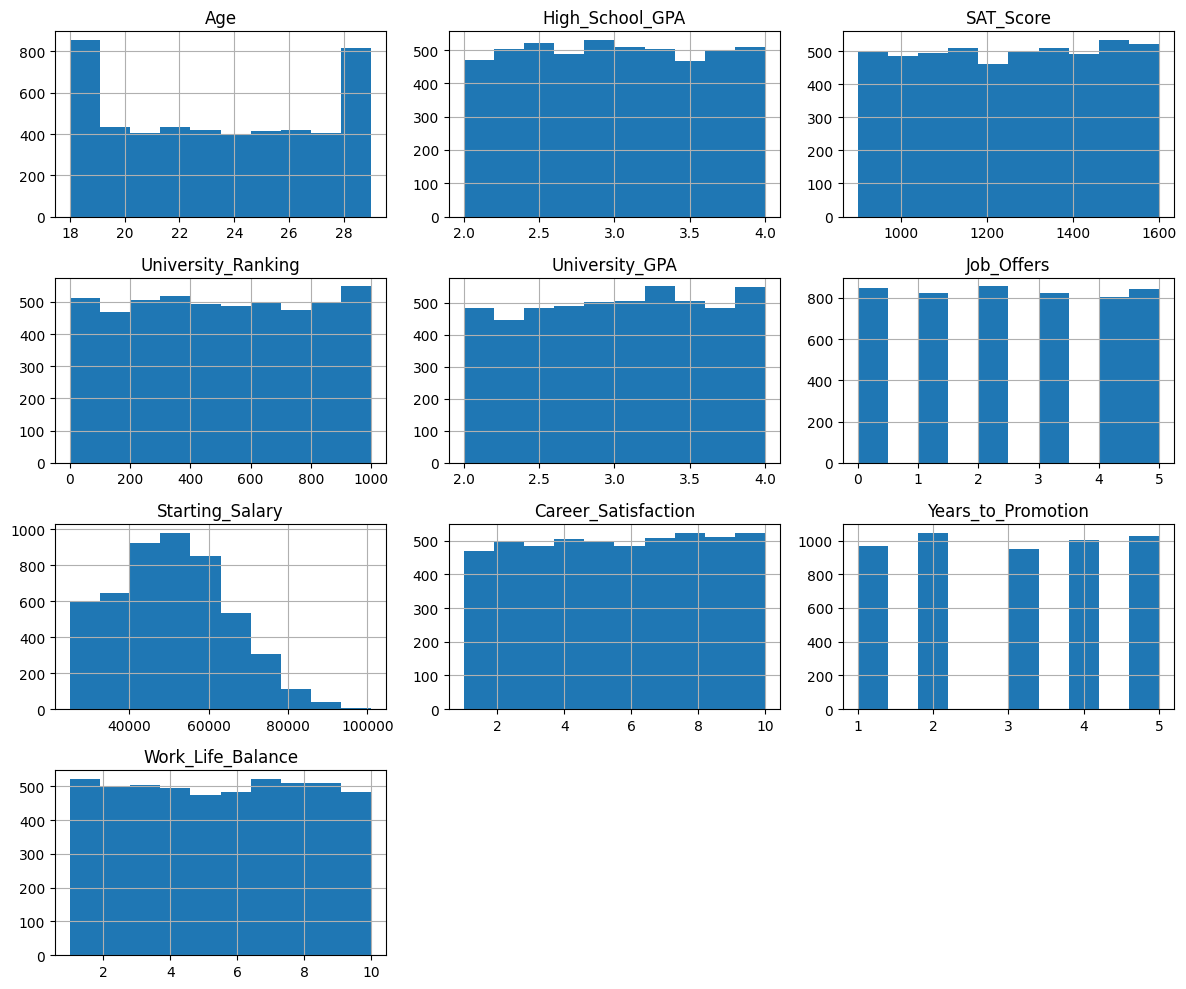

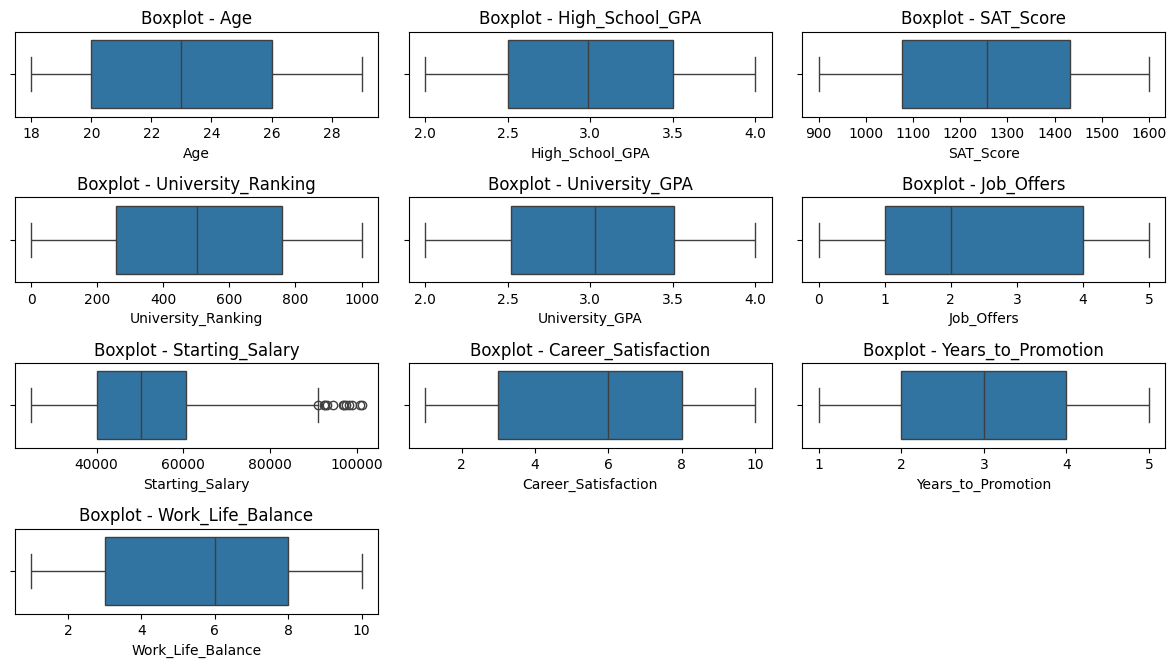

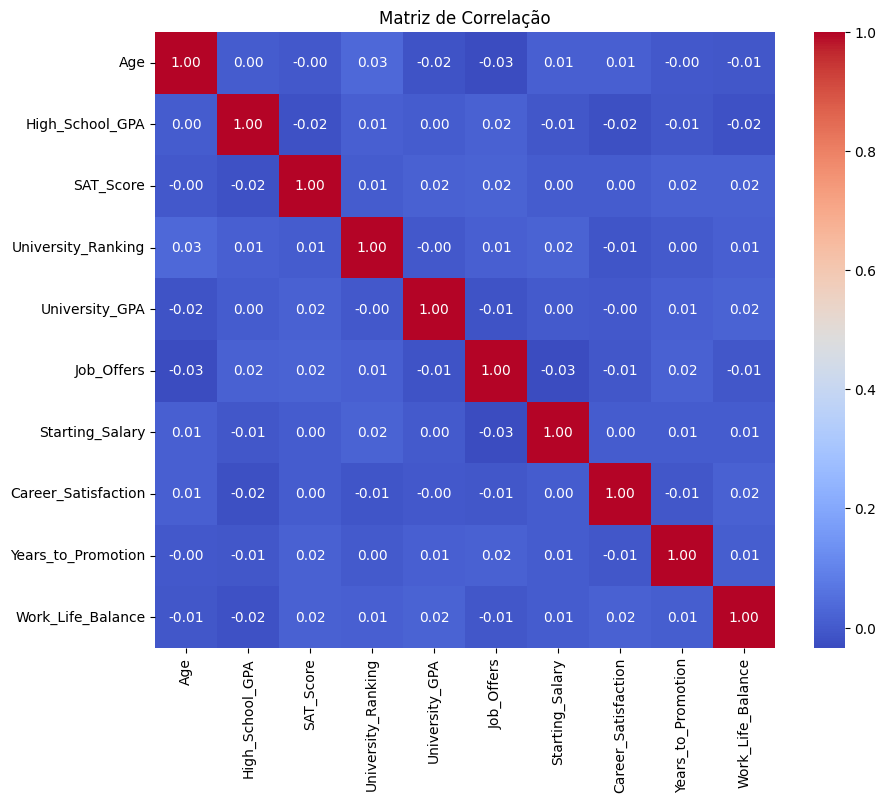

In [ ]:
# Visualizar distribuições das variáveis numéricas
numerical_cols = ['Age',	'High_School_GPA',	'SAT_Score',	'University_Ranking',	'University_GPA', 'Job_Offers',	'Starting_Salary',	'Career_Satisfaction',	'Years_to_Promotion',	'Work_Life_Balance']
df[numerical_cols].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Boxplots para identificar outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

# Matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()


In [ ]:
df.groupby('Current_Job_Level')['Career_Satisfaction'].value_counts().unstack()

Career_Satisfaction   1    2    3    4    5    6    7    8    9    10
Current_Job_Level                                                    
Entry                229  251  217  230  277  235  257  265  254  248
Executive             22   14   24   27   17   22   23   25   25   24
Mid                  138  143  166  163  130  147  155  159  172  171
Senior                80   89   76   86   73   79   73   73   60   81

In [ ]:
colunas = ['Age', 'Gender', 'Field_of_Study', 'Job_Offers', 'Years_to_Promotion', 'Current_Job_Level', 'Work_Life_Balance']
for coluna in colunas:
    print(df.groupby(coluna)['Career_Satisfaction'].value_counts(normalize=True).unstack() * 100)
    print()

Career_Satisfaction         1          2          3          4          5   \
Age                                                                          
18                    9.713024  11.037528  10.596026   7.064018   9.933775   
19                    9.203980  10.696517   9.452736  11.442786   9.950249   
20                   10.599078   9.677419   8.525346  10.829493   9.677419   
21                   10.344828  11.576355   6.896552  12.315271   8.620690   
22                   10.648148  10.185185   8.101852  11.574074  10.416667   
23                    7.838480  10.688836  10.926366   9.501188  10.213777   
24                   10.406091   8.883249   9.644670   6.852792   6.598985   
25                    7.913669  10.551559   7.434053  11.750600  11.031175   
26                    9.047619   9.523810  11.190476  11.666667  11.428571   
27                    9.677419  10.421836  13.151365   9.429280  10.421836   
28                    8.730159   7.407407   9.788360  11.375661 

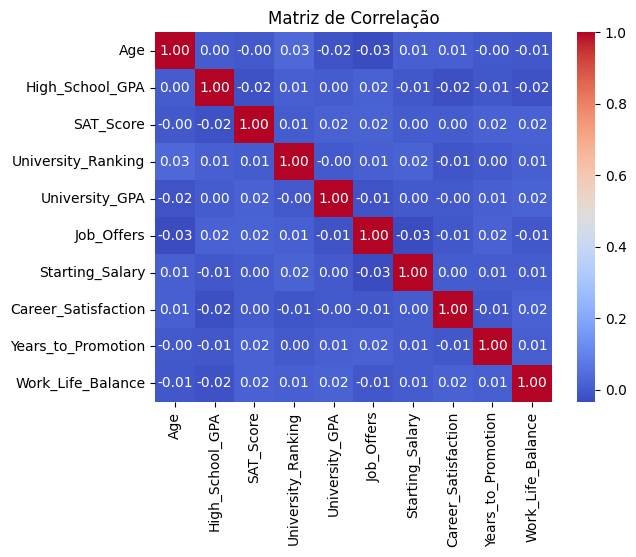

In [ ]:
num_col = df.columns[df.dtypes != 'object']
sns.heatmap(df[num_col].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
df['Field_of_Study'].value_counts()

Field_of_Study
Arts                749
Mathematics         745
Law                 727
Business            719
Engineering         701
Medicine            689
Computer Science    670
Name: count, dtype: int64

In [ ]:
df['Entrepreneurship'].value_counts()

Entrepreneurship
No     3992
Yes    1008
Name: count, dtype: int64

In [ ]:
df.groupby("Age").mean(numeric_only=True)

High_School_GPA    SAT_Score  University_Ranking  University_GPA  \
Age                                                                     
18          3.010971  1270.849890          483.615894        3.032914   
19          2.995821  1234.758706          501.669154        2.996592   
20          2.977396  1255.601382          495.338710        3.020253   
21          2.988892  1238.431034          508.463054        3.083325   
22          3.022292  1264.865741          510.446759        3.030000   
23          3.004822  1254.052257          493.995249        3.012328   
24          2.967132  1261.829949          502.842640        3.032538   
25          2.965899  1264.071942          491.702638        2.992398   
26          3.011024  1235.321429          510.830952        3.007119   
27          3.016849  1257.387097          498.702233        3.020844   
28          2.965952  1246.455026          517.346561        3.026534   
29          3.029273  1259.043182          538.154545        2.988091   

     Job_Offers  Starting_Salary  Career_Satisfaction  Years_to_Promotion  \
Age                                                                         
18     2.573951     50820.971302             5.567329            2.984547   
19     2.641791     50459.950249             5.492537            2.942786   
20     2.437788     50781.336406             5.543779            3.025346   
21     2.490148     50053.694581             5.566502            3.061576   
22     2.636574     49438.657407             5.483796            3.168981   
23     2.408551     50546.080760             5.603325            3.002375   
24     2.616751     49674.111675             5.804569            3.060914   
25     2.287770     51724.940048             5.633094            3.007194   
26     2.454762     50078.809524             5.450000            2.930952   
27     2.421836     51246.401985             5.369727            2.972705   
28     2.473545     50417.724868             5.656085            3.029101   
29     2.425000     51428.181818             5.770455            3.002273   

     Work_Life_Balance  
Age                     
18            5.646799  
19            5.380597  
20            5.541475  
21            5.369458  
22            5.502315  
23            5.460808  
24            5.459391  
25            5.532374  
26            5.569048  
27            5.545906  
28            5.301587  
29            5.440909

In [ ]:
# Analisando a quantidade de anos para promoção por idade
df.groupby('Age')['Years_to_Promotion'].agg(['max', 'mean', 'min'])
# Não faz sentido pessoas com 18 anos terem 5 anos para promoção, considerando que em teoria acabaram de entrar no mercado de trabalho

max      mean  min
Age                    
18     5  2.984547    1
19     5  2.942786    1
20     5  3.025346    1
21     5  3.061576    1
22     5  3.168981    1
23     5  3.002375    1
24     5  3.060914    1
25     5  3.007194    1
26     5  2.930952    1
27     5  2.972705    1
28     5  3.029101    1
29     5  3.002273    1

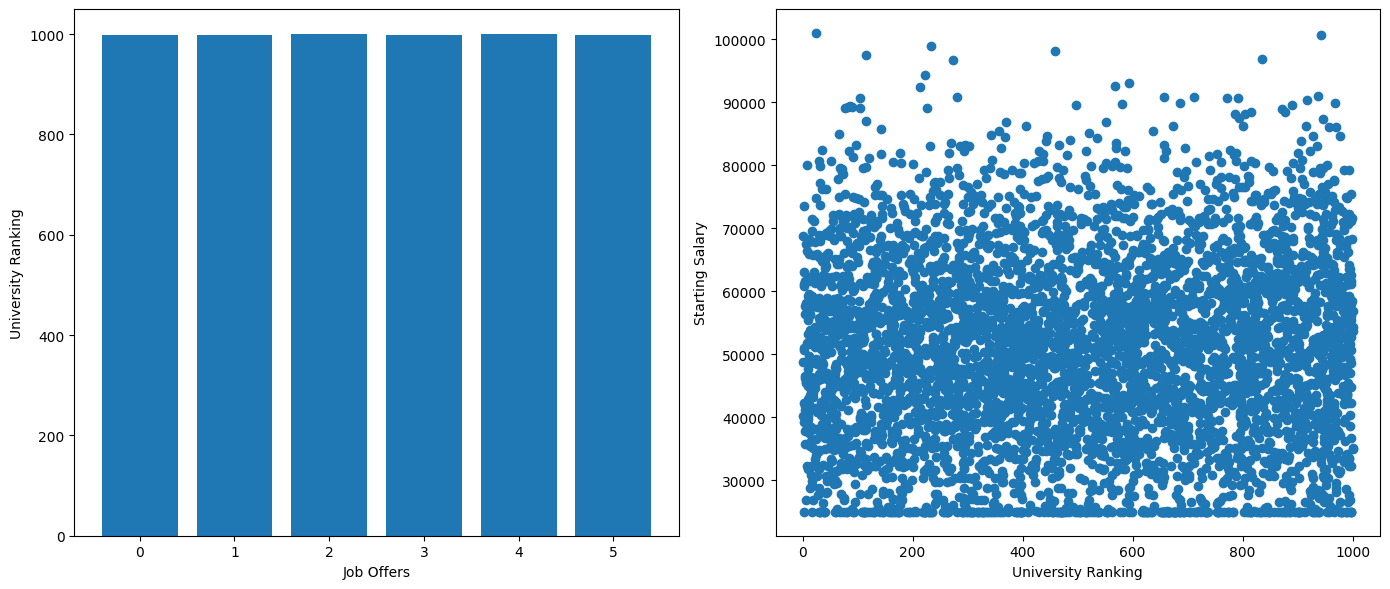

In [ ]:
# Analisando o comportamento do ranking da universidade e sua relevância no dataset
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14, 6))
ax1.bar(df['Job_Offers'], df['University_Ranking'])
ax1.set_xlabel('Job Offers')
ax1.set_ylabel('University Ranking')

ax2.scatter(df['University_Ranking'], df['Starting_Salary'])
ax2.set_xlabel('University Ranking')
ax2.set_ylabel('Starting Salary')

plt.tight_layout()
plt.show()

# Pré-processamento dos Dados

In [ ]:
# Determinando a coluna Student ID como índice
df.set_index('Student_ID', inplace=True)
df.head()

Age  Gender  High_School_GPA  SAT_Score  University_Ranking  \
Student_ID                                                                
S00001       24    Male             3.58       1052                 291   
S00002       21   Other             2.52       1211                 112   
S00003       28  Female             3.42       1193                 715   
S00004       25    Male             2.43       1497                 170   
S00005       22    Male             2.08       1012                 599   

            University_GPA    Field_of_Study  Job_Offers  Starting_Salary  \
Student_ID                                                                  
S00001                3.96              Arts           5          27200.0   
S00002                3.63               Law           4          25000.0   
S00003                2.63          Medicine           0          42400.0   
S00004                2.81  Computer Science           1          57400.0   
S00005                2.48       Engineering           4          47600.0   

            Career_Satisfaction  Years_to_Promotion Current_Job_Level  \
Student_ID                                                              
S00001                        4                   5             Entry   
S00002                        1                   1               Mid   
S00003                        9                   3             Entry   
S00004                        7                   5               Mid   
S00005                        9                   5             Entry   

            Work_Life_Balance Entrepreneurship  
Student_ID                                      
S00001                      7               No  
S00002                      7               No  
S00003                      7               No  
S00004                      5               No  
S00005                      2               No

In [ ]:
# Excluindo a coluna University_Ranking, já que, conforme analisado, não é um dado relevante para clusterização dos dados
df.drop('University_Ranking', axis=1, inplace=True)
df.head()

Age  Gender  High_School_GPA  SAT_Score  University_GPA  \
Student_ID                                                            
S00001       24    Male             3.58       1052            3.96   
S00002       21   Other             2.52       1211            3.63   
S00003       28  Female             3.42       1193            2.63   
S00004       25    Male             2.43       1497            2.81   
S00005       22    Male             2.08       1012            2.48   

              Field_of_Study  Job_Offers  Starting_Salary  \
Student_ID                                                  
S00001                  Arts           5          27200.0   
S00002                   Law           4          25000.0   
S00003              Medicine           0          42400.0   
S00004      Computer Science           1          57400.0   
S00005           Engineering           4          47600.0   

            Career_Satisfaction  Years_to_Promotion Current_Job_Level  \
Student_ID                                                              
S00001                        4                   5             Entry   
S00002                        1                   1               Mid   
S00003                        9                   3             Entry   
S00004                        7                   5               Mid   
S00005                        9                   5             Entry   

            Work_Life_Balance Entrepreneurship  
Student_ID                                      
S00001                      7               No  
S00002                      7               No  
S00003                      7               No  
S00004                      5               No  
S00005                      2               No

In [ ]:
# # Remover pessoas com menos de 23 anos, pois a coluna Years to Promotion varia de 1 a 5, e consideramos que as pessoas entraram no mercado de trabalho aos 18
# df.drop(df[df['Age'] < 23].index, inplace=True)
# df['Age'].value_counts()

In [ ]:
# df.drop(df[df['Field_of_Study'] != 'Computer Science'].index, inplace=True)
# df['Field_of_Study'].value_counts()

In [ ]:
# Remover empreendedores, para analisarmos apenas pessoas no mercado de trabalho
df.drop(df[df['Entrepreneurship'] == 'Yes'].index, inplace=True)
df['Entrepreneurship'].value_counts()

Entrepreneurship
No    3992
Name: count, dtype: int64

In [ ]:
# Remover homens, para analisarmos apenas pessoas do sexo feminino no mercado de trabalho
df.drop(df[df['Gender'] != 'Female'].index, inplace=True)
df['Gender'].value_counts()

Gender
Female    1869
Name: count, dtype: int64

In [ ]:
df['Current_Job_Level'].value_counts()

Current_Job_Level
Entry        946
Mid          569
Senior       276
Executive     78
Name: count, dtype: int64

In [ ]:
# Vamos trabalhar apenas com as pessoas que estão entrando agora no mercado
df.drop(df[df['Current_Job_Level'] != 'Entry'].index, inplace=True)
df['Current_Job_Level'].value_counts()

Current_Job_Level
Entry    946
Name: count, dtype: int64

In [ ]:
# Como agora só temos uma variável nas colunas Gender, Entrepeneurship e Current_Job_Level, podemos removê-las
df.drop(['Gender', 'Entrepreneurship', 'Current_Job_Level'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 946 entries, S00003 to S04997
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  946 non-null    int64  
 1   High_School_GPA      946 non-null    float64
 2   SAT_Score            946 non-null    int64  
 3   University_GPA       946 non-null    float64
 4   Field_of_Study       946 non-null    object 
 5   Job_Offers           946 non-null    int64  
 6   Starting_Salary      946 non-null    float64
 7   Career_Satisfaction  946 non-null    int64  
 8   Years_to_Promotion   946 non-null    int64  
 9   Work_Life_Balance    946 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 81.3+ KB


In [ ]:
# Substituir valores categóricos por numéricos
# df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1, 'Other': 2})
# df['Current_Job_Level'] = df['Current_Job_Level'].map({'Entry': 0, 'Mid': 1, 'Senior': 2, 'Executive': 3})
df['Field_of_Study'] = df['Field_of_Study'].astype('category').cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 946 entries, S00003 to S04997
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  946 non-null    int64  
 1   High_School_GPA      946 non-null    float64
 2   SAT_Score            946 non-null    int64  
 3   University_GPA       946 non-null    float64
 4   Field_of_Study       946 non-null    int8   
 5   Job_Offers           946 non-null    int64  
 6   Starting_Salary      946 non-null    float64
 7   Career_Satisfaction  946 non-null    int64  
 8   Years_to_Promotion   946 non-null    int64  
 9   Work_Life_Balance    946 non-null    int64  
dtypes: float64(3), int64(6), int8(1)
memory usage: 74.8+ KB


In [ ]:
# Como estamos trabalhando só com entrantes no mercado de trabalho, não há anos para promoção
df.drop('Years_to_Promotion', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 946 entries, S00003 to S04997
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  946 non-null    int64  
 1   High_School_GPA      946 non-null    float64
 2   SAT_Score            946 non-null    int64  
 3   University_GPA       946 non-null    float64
 4   Field_of_Study       946 non-null    int8   
 5   Job_Offers           946 non-null    int64  
 6   Starting_Salary      946 non-null    float64
 7   Career_Satisfaction  946 non-null    int64  
 8   Work_Life_Balance    946 non-null    int64  
dtypes: float64(3), int64(5), int8(1)
memory usage: 67.4+ KB


### Padronizar os dados

In [ ]:
# Padronizar as variáveis
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

Age  High_School_GPA  SAT_Score  University_GPA  \
Student_ID                                                         
S00003      1.210218         0.688709  -0.286523       -0.675533   
S00011      1.210218        -0.130965  -0.653644       -0.252330   
S00019     -0.489237         1.211906   1.373063        0.752778   
S00021      0.360491        -1.334317   0.829926       -0.834234   
S00026     -0.489237         1.089827  -0.543004        1.193614   

            Field_of_Study  Job_Offers  Starting_Salary  Career_Satisfaction  \
Student_ID                                                                     
S00003            1.471488   -1.441374        -0.551252             1.224021   
S00011            0.975928    1.458541        -1.657433             1.224021   
S00019            0.975928    1.458541        -1.252062             1.224021   
S00021            1.471488    1.458541        -0.564994            -1.587327   
S00026            1.471488    0.878558        -0.159624            -0.884490   

            Work_Life_Balance  
Student_ID                     
S00003               0.539766  
S00011              -1.162297  
S00019               0.539766  
S00021               1.220592  
S00026              -0.141059

### Definição das Features

In [ ]:
# Selecionar variáveis para clusterização
# features = ['SAT_Score', 'University_GPA', 'Field_of_Study', 'Job_Offers', 'Starting_Salary']
features = df.columns

# Determinação do Número Ótimo de Clusters

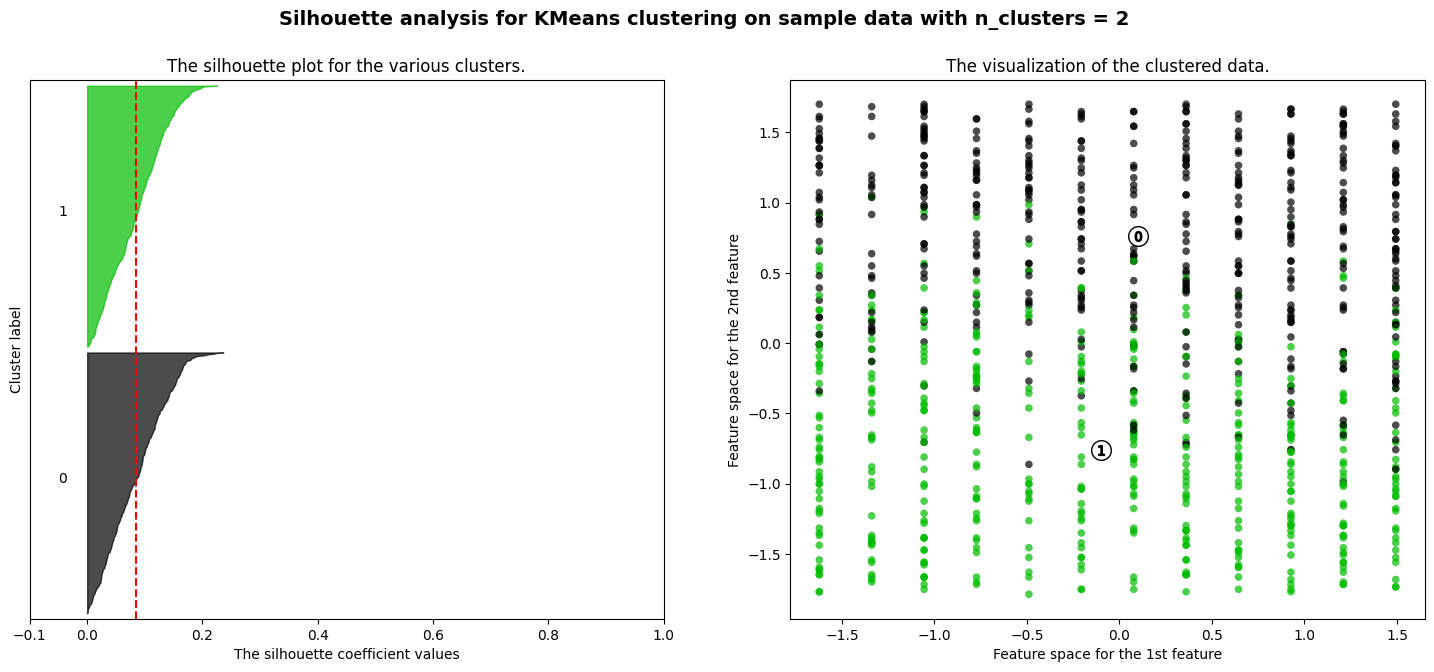

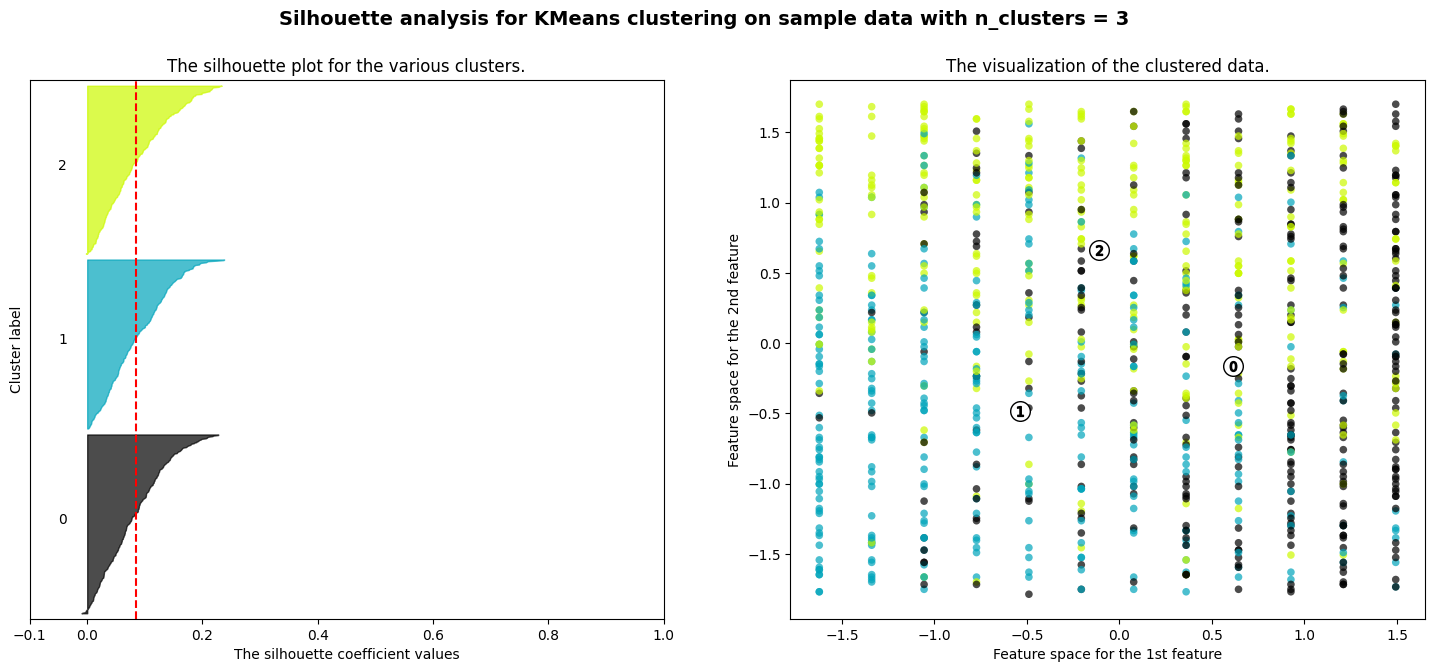

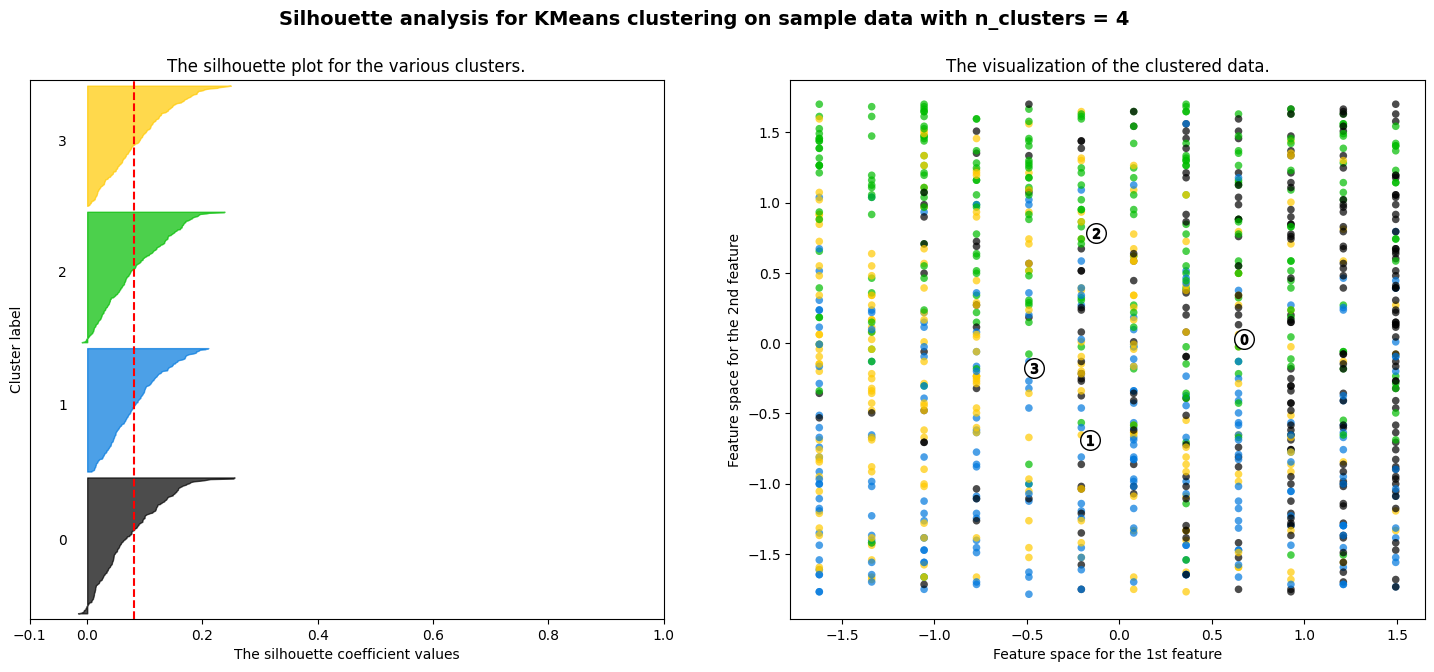

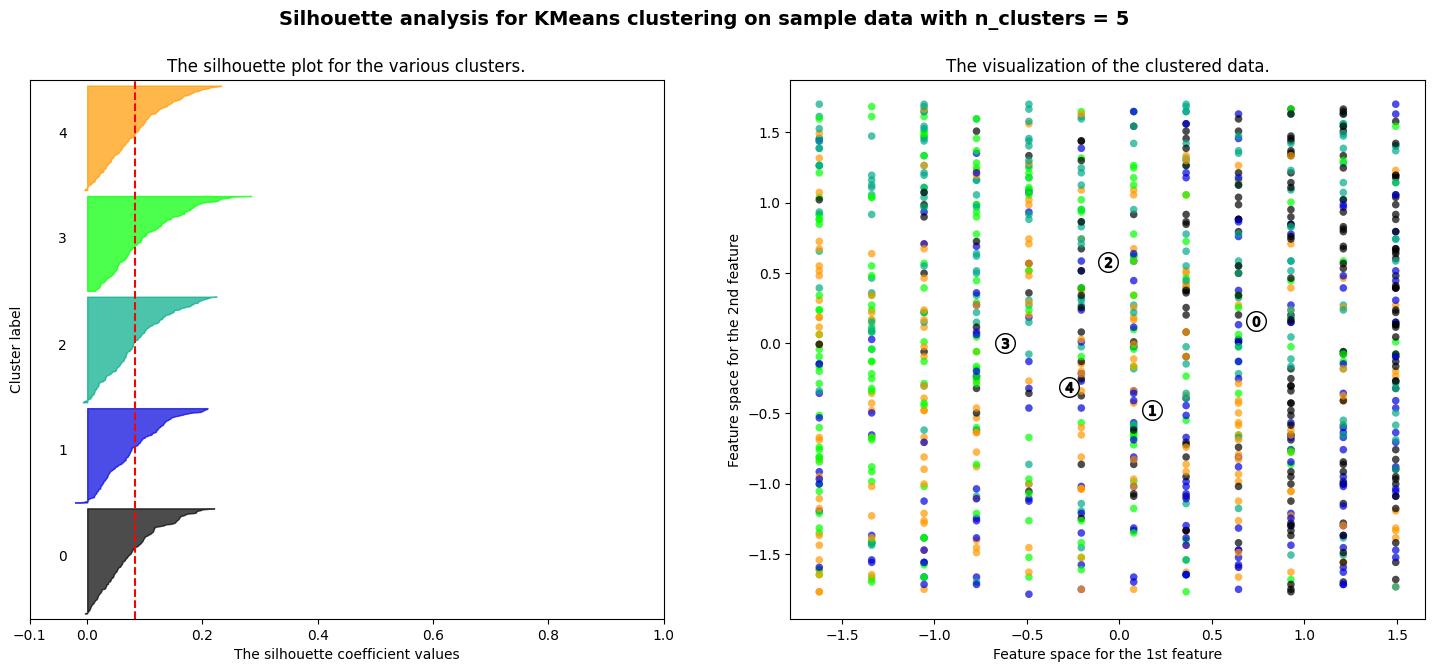

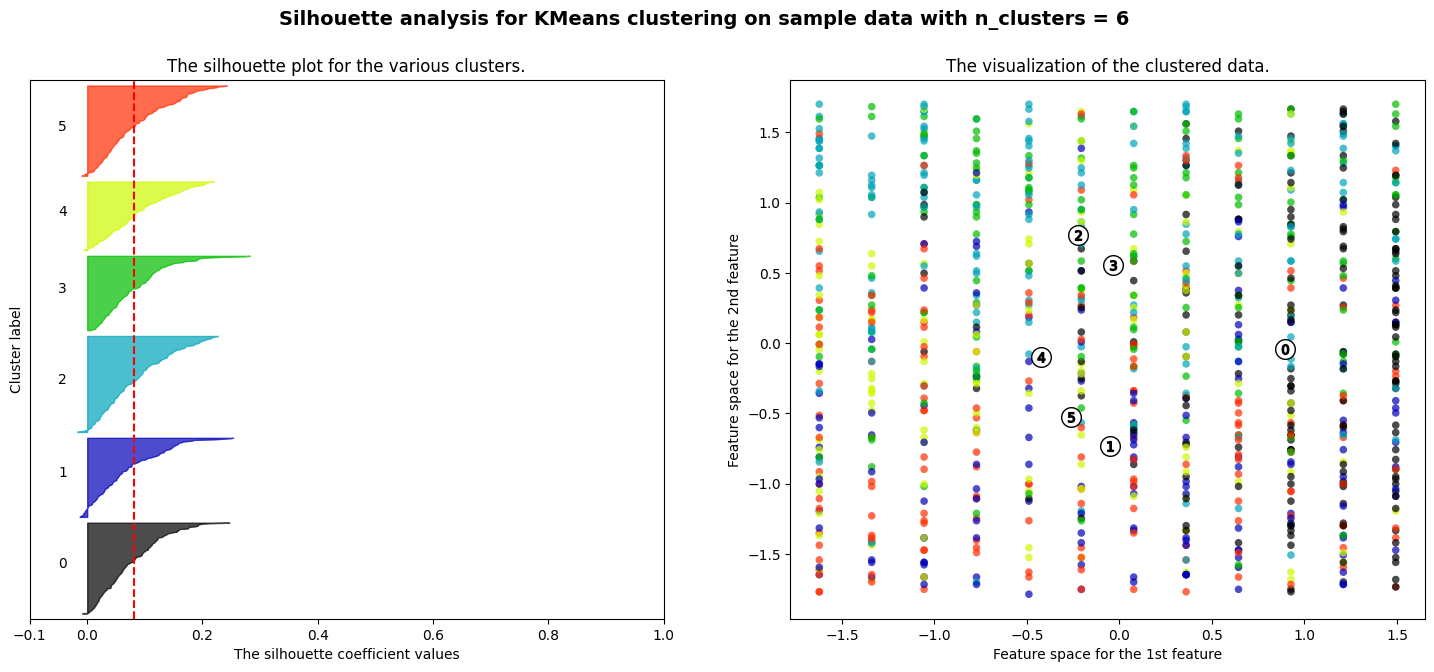

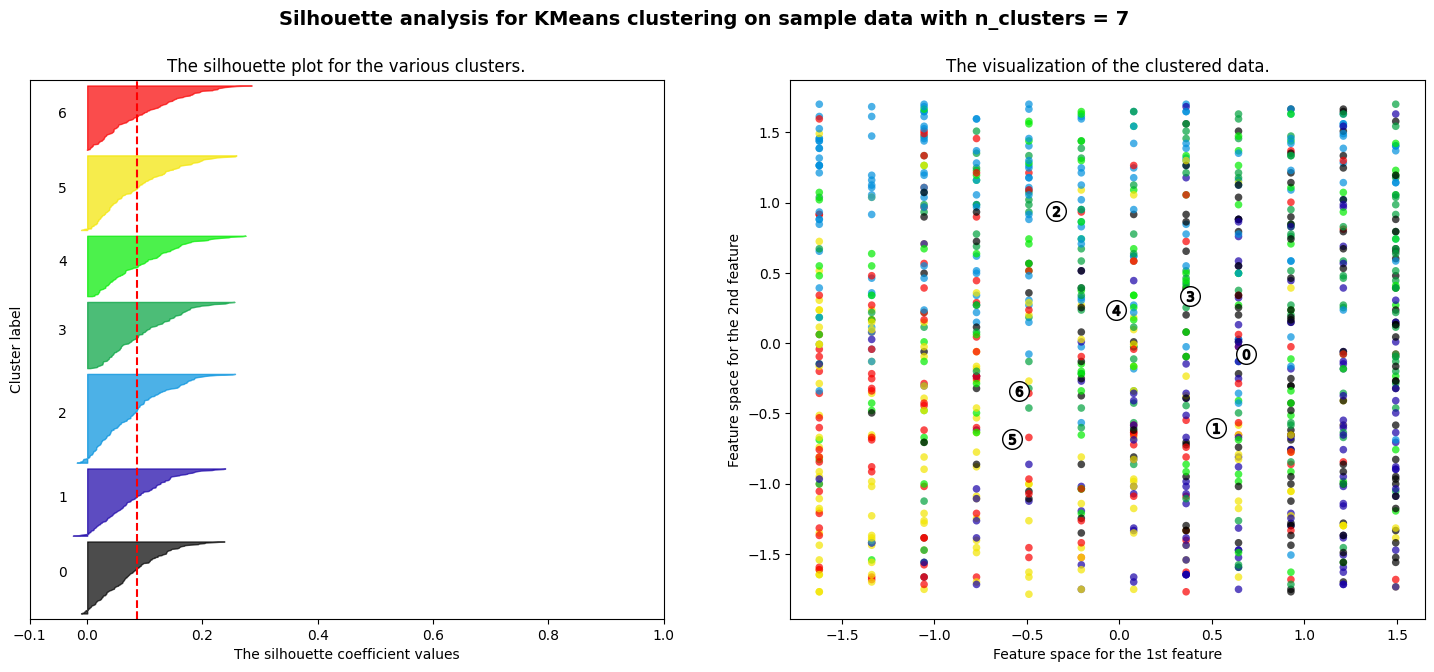

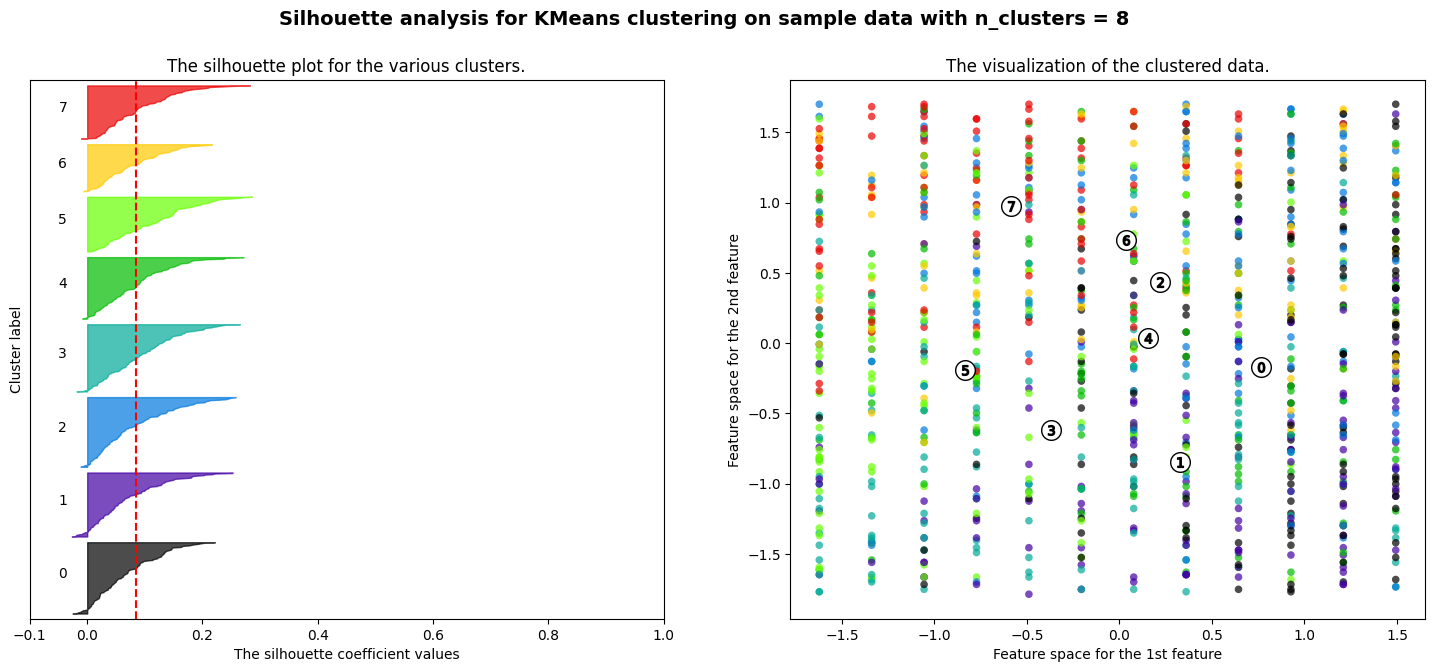

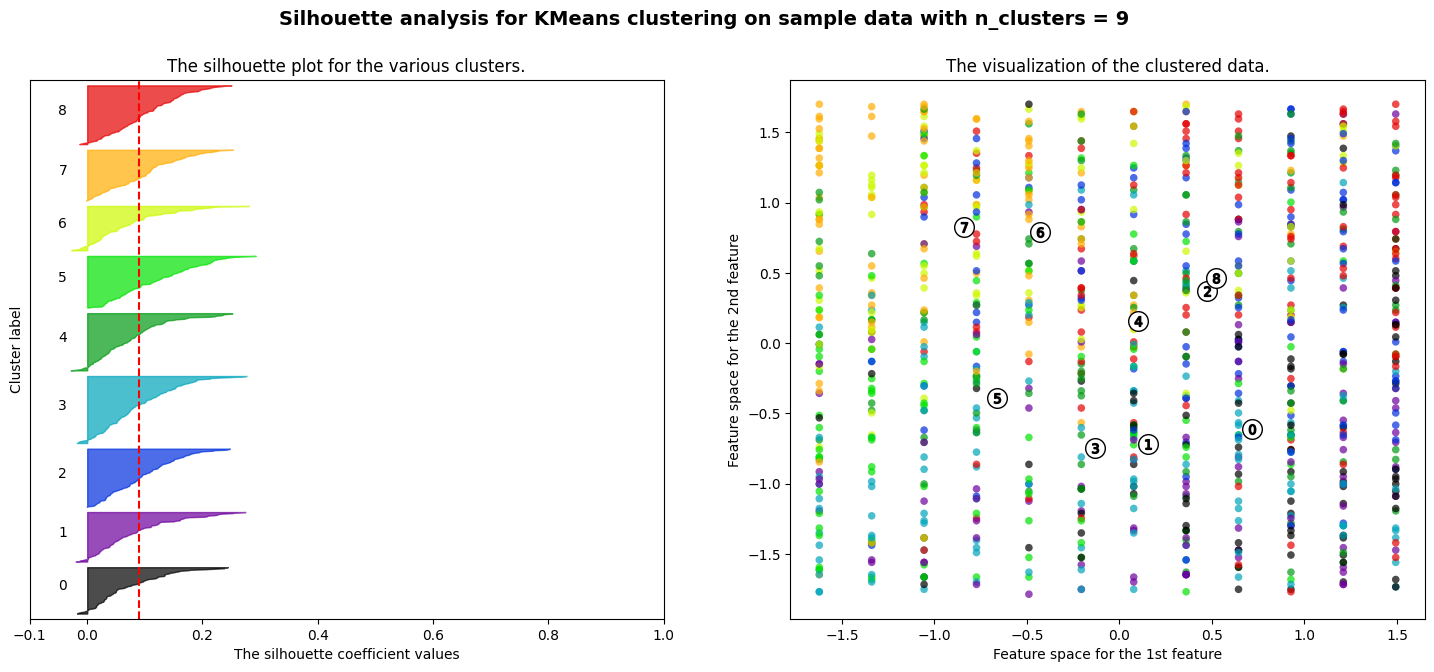

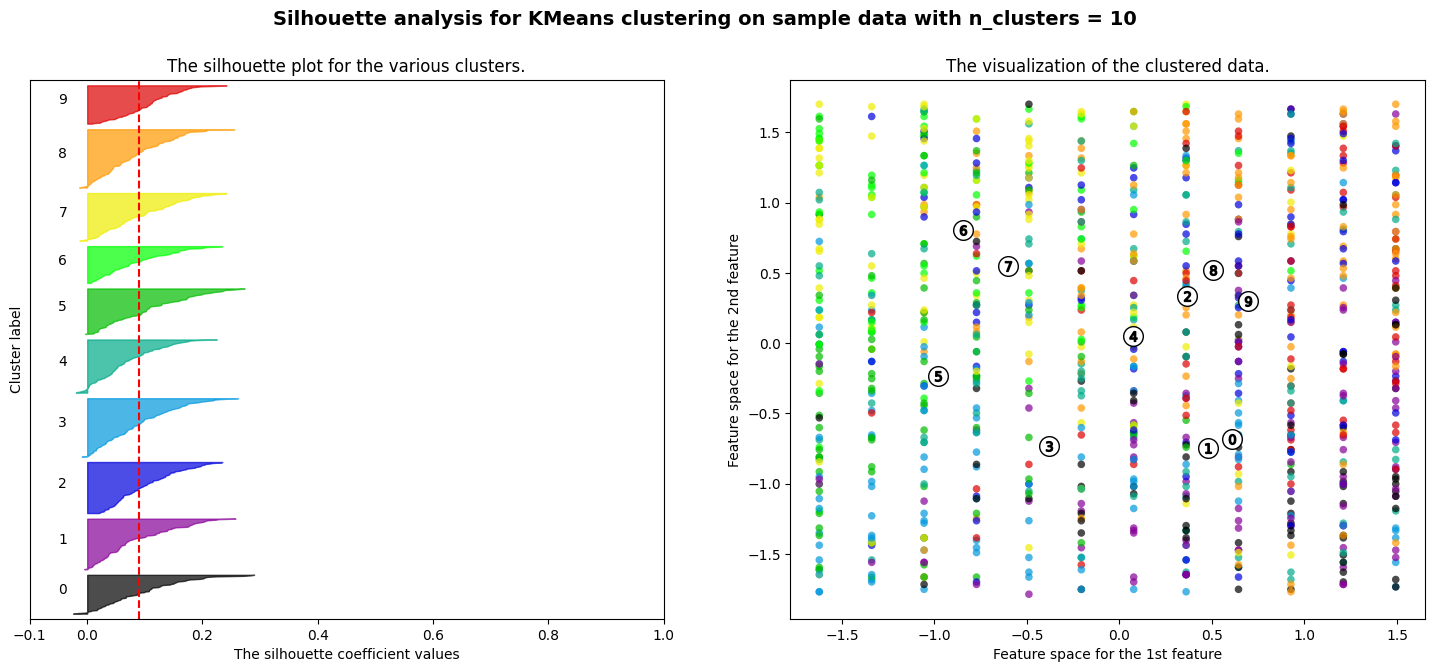

In [ ]:
# Definição do número máximo de clusters a ser testado
n_clusters = 11
inertia = []
silhouettes = []
clusters = range(2, n_clusters)
X = df_scaled[features].copy()

for k in clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Configuração inicial do gráfico de silhueta
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (k + 1) * 10])

    # Aplicação do K-Means
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)

    labels = kmeans.predict(X)
    silh = silhouette_score(X, labels)  # Cálculo da média da silhueta

    silhouettes.append(silh)
    inertia.append(kmeans.inertia_)

    # Cálculo do coeficiente de silhueta para cada ponto
    sample_silhouette_values = silhouette_samples(X, labels)

    y_lower = 10
    for i in range(k):
        # Seleciona os coeficientes de silhueta do cluster i e ordena
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10 # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silh, color="red", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Gráfico de dispersão dos clusters
    colors = cm.nipy_spectral(labels.astype(float) / k)

    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker="o", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Centro dos clusters
    centers = kmeans.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % k,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

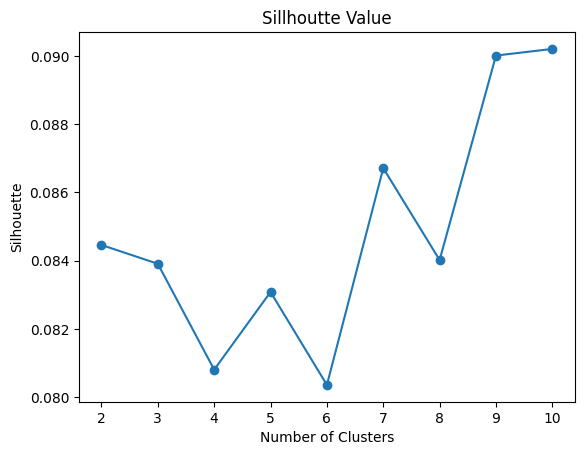

In [ ]:
plt.plot(clusters, silhouettes, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette')
plt.title('Sillhoutte Value')
plt.show()

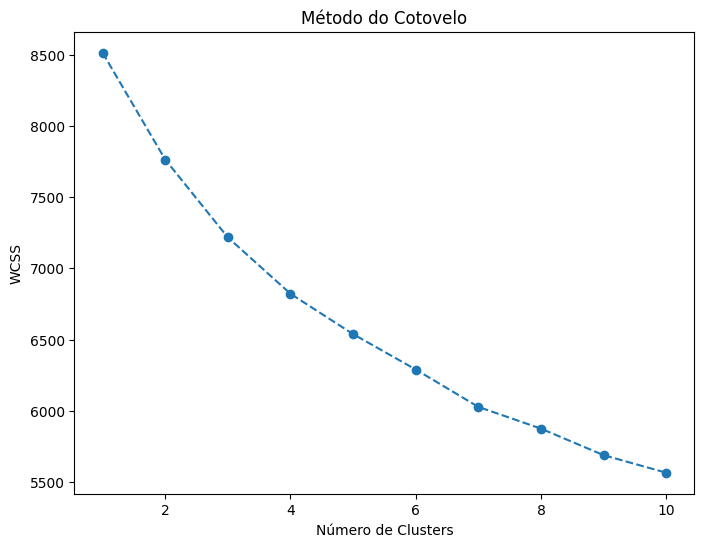

In [ ]:
# Método do Cotovelo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()


# Aplicação do K-means Clustering

In [ ]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 946 entries, S00003 to S04997
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  946 non-null    float64
 1   High_School_GPA      946 non-null    float64
 2   SAT_Score            946 non-null    float64
 3   University_GPA       946 non-null    float64
 4   Field_of_Study       946 non-null    float64
 5   Job_Offers           946 non-null    float64
 6   Starting_Salary      946 non-null    float64
 7   Career_Satisfaction  946 non-null    float64
 8   Work_Life_Balance    946 non-null    float64
dtypes: float64(9)
memory usage: 106.2+ KB


In [ ]:
# Definir o número de clusters com base no Método do Cotovelo
n_clusters = 4  # Ajustar conforme o gráfico do cotovelo

# Aplicar o K-means
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

df_scaled_no_cluster = df_scaled.drop(columns=['Cluster'])
# Exibir os centróides dos clusters
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df_scaled_no_cluster.columns)
centroids

Age  High_School_GPA    SAT_Score  University_GPA  Field_of_Study  \
0  24.112450         3.345863  1163.586345        2.793936        4.044177   
1  25.907950         3.026151  1227.640167        3.089414        2.744770   
2  22.650442         2.789248  1287.986726        3.214558        4.349558   
3  22.116379         2.909483  1328.668103        2.973448        0.952586   

   Job_Offers  Starting_Salary  Career_Satisfaction  Work_Life_Balance  
0    2.734940     50052.208835             3.228916           4.369478  
1    1.004184     56147.280335             7.435146           4.665272  
2    3.685841     49839.823009             7.106195           6.615044  
3    2.573276     45493.103448             4.448276           6.137931

# Avaliação dos Clusters

In [ ]:
# Calcular o Silhouette Score
sil_score = silhouette_score(df_scaled, df_scaled['Cluster'])
print(f'Silhouette Score: {sil_score:.3f}')


Silhouette Score: 0.138


# Análise e Visualização dos Clusters

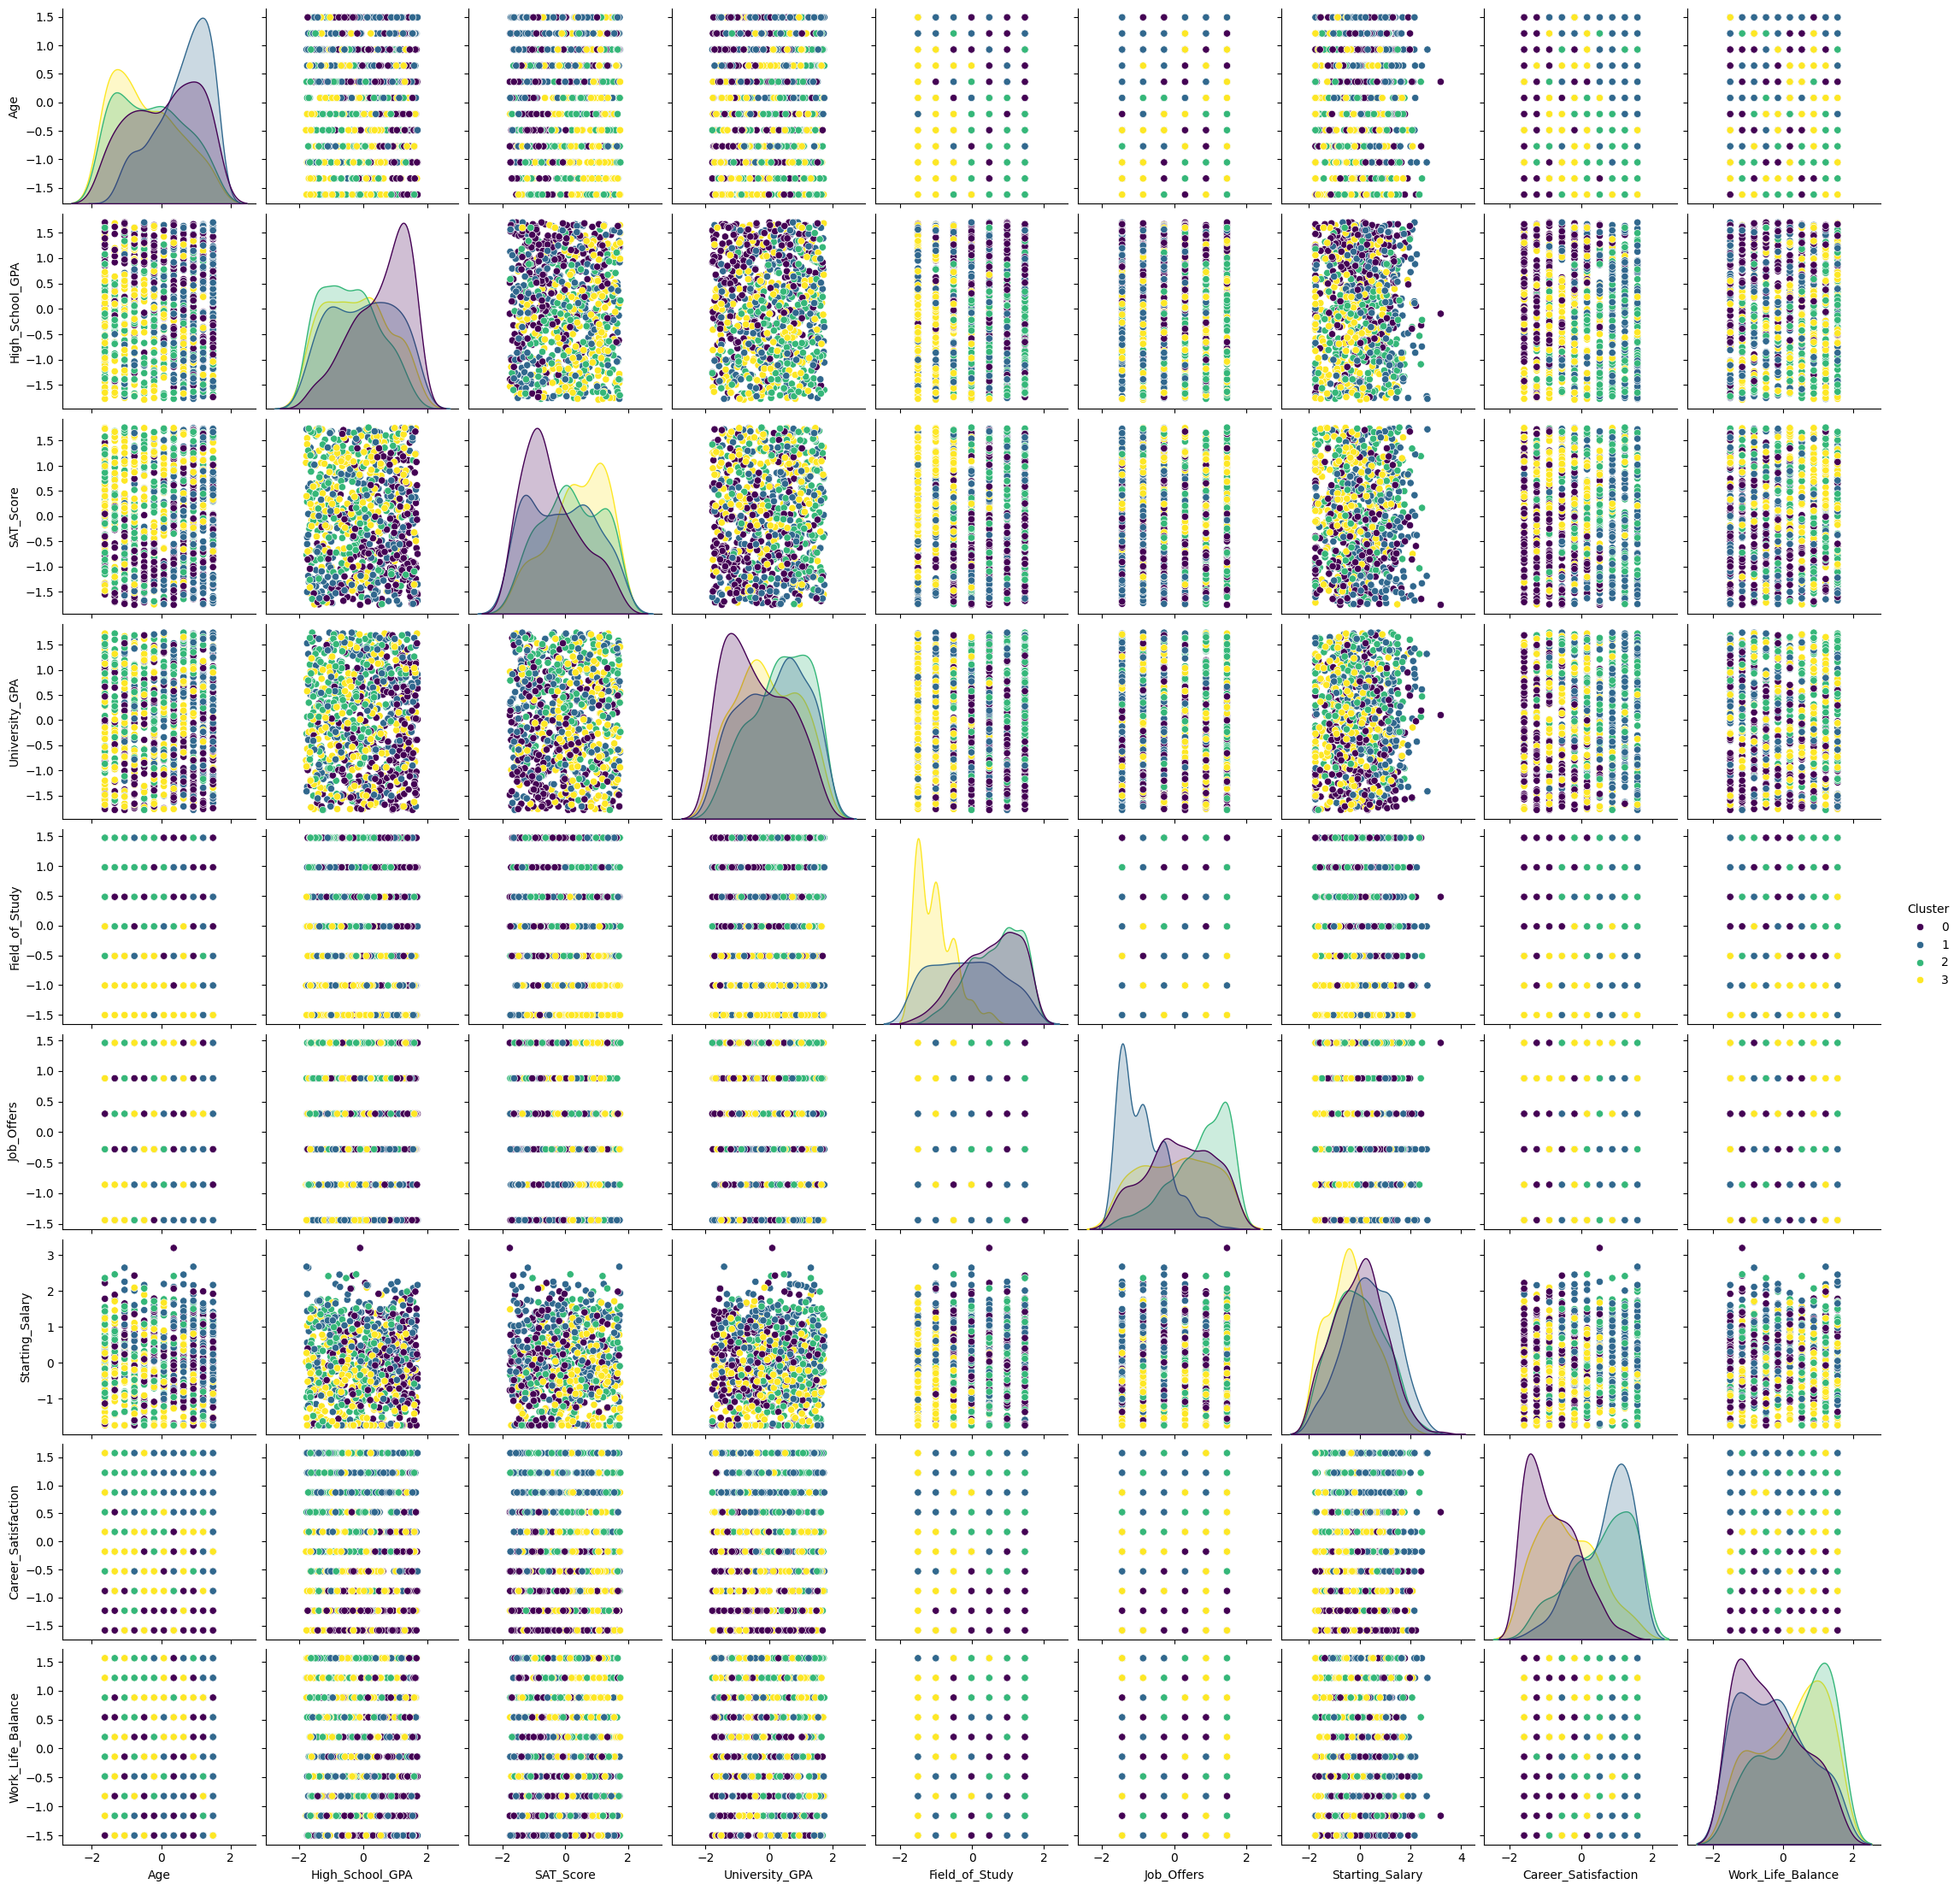

In [ ]:
# Pairplot para visualizar relações entre múltiplas variáveis
sns.pairplot(df_scaled, hue='Cluster', palette='viridis')
plt.show()


In [ ]:
df['Cluster'] = df.index.map(df_scaled['Cluster'])
df.head()

Age  High_School_GPA  SAT_Score  University_GPA  Field_of_Study  \
Student_ID                                                                    
S00003       28             3.42       1193            2.63               6   
S00011       28             2.95       1120            2.87               5   
S00019       22             3.72       1523            3.44               5   
S00021       25             2.26       1415            2.54               6   
S00026       22             3.65       1142            3.69               6   

            Job_Offers  Starting_Salary  Career_Satisfaction  \
Student_ID                                                     
S00003               0          42400.0                    9   
S00011               5          26300.0                    9   
S00019               5          32200.0                    9   
S00021               5          42200.0                    1   
S00026               4          48100.0                    3   

            Work_Life_Balance  Cluster  
Student_ID                              
S00003                      7        1  
S00011                      2        2  
S00019                      7        2  
S00021                      9        2  
S00026                      5        0

In [ ]:
df.groupby('Cluster').min()

Age  High_School_GPA  SAT_Score  University_GPA  Field_of_Study  \
Cluster                                                                    
0         18             2.03        900            2.00               0   
1         19             2.01        903            2.00               0   
2         18             2.01        903            2.00               1   
3         18             2.00        902            2.01               0   

         Job_Offers  Starting_Salary  Career_Satisfaction  Work_Life_Balance  
Cluster                                                                       
0                 0          25000.0                    1                  1  
1                 0          25000.0                    1                  1  
2                 0          25000.0                    1                  1  
3                 0          25000.0                    1                  1

In [ ]:
df.groupby('Cluster').max()

Age  High_School_GPA  SAT_Score  University_GPA  Field_of_Study  \
Cluster                                                                    
0         29             4.00       1593            3.97               6   
1         29             4.00       1598            4.00               6   
2         29             3.94       1600            4.00               6   
3         29             3.99       1599            3.99               4   

         Job_Offers  Starting_Salary  Career_Satisfaction  Work_Life_Balance  
Cluster                                                                       
0                 5          96900.0                    9                 10  
1                 5          89300.0                   10                 10  
2                 5          86200.0                   10                 10  
3                 5          80800.0                   10                 10

In [ ]:
df.groupby('Cluster').mean()

Age  High_School_GPA    SAT_Score  University_GPA  \
Cluster                                                            
0        24.112450         3.345863  1163.586345        2.793936   
1        25.907950         3.026151  1227.640167        3.089414   
2        22.650442         2.789248  1287.986726        3.214558   
3        22.116379         2.909483  1328.668103        2.973448   

         Field_of_Study  Job_Offers  Starting_Salary  Career_Satisfaction  \
Cluster                                                                     
0              4.044177    2.734940     50052.208835             3.228916   
1              2.744770    1.004184     56147.280335             7.435146   
2              4.349558    3.685841     49839.823009             7.106195   
3              0.952586    2.573276     45493.103448             4.448276   

         Work_Life_Balance  
Cluster                     
0                 4.369478  
1                 4.665272  
2                 6.615044  
3                 6.137931

In [ ]:
df.groupby('Field_of_Study')['Cluster'].value_counts().unstack()

Cluster            0     1     2     3
Field_of_Study                        
0                4.0  39.0   NaN  97.0
1               12.0  35.0   7.0  73.0
2               32.0  38.0  18.0  44.0
3               42.0  37.0  41.0  12.0
4               46.0  40.0  42.0   6.0
5               57.0  26.0  59.0   NaN
6               56.0  24.0  59.0   NaN

- Reverter field of study

1. Cluster 0
- Maior média High School GPA
- Menor média SATs
- Menor média University GPA
- segunda maior média de salário inicial
- Menor média de satisfação com a carreira
- Menor equilíbrio de vida/trabalho
<br>Estudaram muito no colégio, mas depois largaram mais os estudos, tendo baixas notas no SATs e na universidade. Têm altos salários (2a maior média) mas baixo equilíbrio entre vida (menor média) e trabalho e são os mais insatisfeitas com sua carreira

2. Cluster 1
- Maior média de idade
- Menor média de ofertas de trabalho
- Maior média de salário inicial
- Maior média de satisfação com a carreira
- Baixo equilíbrio de vida/trabalho (2o menor)
<br>Pessoas mais velhas, com poucas mas boas ofertas de trabalho, têm a maior média de salários iniciais, apesar de baixo equilíbrio vida/trabalho, são os mais satisfeitos com sua carreira

3. Cluster 2
- Menor média High School GPA
- Maior média University GPA
- Maior média de ofertas de trabalho
- segunda menor média de salário inicial
- Alta média de satisfação com a carreira (2a maior)
- Maior equilíbrio de vida/trabalho
<br>Oposto do cluster 0, não estudavam muito no colégio, mas arrasaram na universidade. Recebem muitas ofertas de trabalho, com a segunda maior média de salário inicial, têm o maior equilíbrio de vida/trabalho e a segunda maior média de satisfação com a carreira

4. Cluster 3
- Menor média de idade
- Maior média SATs
- Menor média de salário inicial
- Baixa média de satisfação com a carreira (2a menor)
- Alto equilíbrio de vida/trabalho (2o maior)
<br>Oposto do cluster 1, pessoas mais novas, maior média do SAT, mas 2a menor média do GPA da universidade. Têm a 2a maior média de equilíbrio vida/trabalho, mas a 2a menor de satisfação com a carreira, tendo também a menor média de salário inicial

Melhor pro pior:
Cluster 2, 1, 3, 0

# Texto a trabalhar

1. Definição da Problemática
Problema:
“Como identificar perfis distintos de estudantes com base nos seus hábitos de jogo, características socioeconômicas e desempenho escolar?”

Esta problemática permite investigar se existem grupos de alunos que, por exemplo, jogam há mais tempo, possuem maior renda familiar ou diferentes níveis de escolaridade dos pais, e se essas características estão associadas a variações no desempenho (Grade). A identificação desses clusters pode auxiliar na criação de estratégias pedagógicas personalizadas e na compreensão do impacto dos hábitos de lazer sobre o rendimento escolar.

2. Escolha e Descrição da Base de Dados
Dataset escolhido:
Utilizaremos a base de dados disponível no Kaggle: Play Games and Success in Students.

Descrição das variáveis principais:

Sex: Gênero do estudante (codificado como 0 e 1).
School Code: Código identificador da escola.
Playing Years: Número de anos que o aluno vem jogando.
Playing Often: Frequência com que o aluno joga (escala de 0 a 5).
Playing Hours: Número de horas diárias dedicadas aos jogos.
Playing Games: Número de tipos de jogos jogados.
Parent Revenue: Renda anual dos pais.
Father Education & Mother Education: Níveis de escolaridade dos pais.
Grade: Desempenho acadêmico (nota/descrição, armazenado como objeto).
Observação: Para análise quantitativa, pode ser interessante tratar a variável “Grade” (caso seja ordinal ou numérica) ou até mesmo removê-la do processo de clusterização – ou usá-la posteriormente para interpretar a relação entre os clusters e o desempenho.

3. Análise Exploratória dos Dados
Nesta etapa, o foco é compreender as características gerais da base:

Estatísticas Descritivas:
Verificar a distribuição, médias, desvios padrão, mínimos e máximos (como já apresentado pelo df.describe()).

Visualizações:

Histograma e Boxplots: Para analisar a distribuição de variáveis como Playing Hours, Parent Revenue e Playing Years.
Matriz de Correlação: Identificar possíveis relações entre variáveis, como a relação entre os anos jogando, a frequência e a performance escolar.
Análise de Outliers: Verificar se há valores discrepantes que possam influenciar a formação dos clusters.
Tratamento dos Dados:

Normalização/Padronização: Como algoritmos de agrupamento (por exemplo, o K-means) são sensíveis à escala, é importante padronizar as variáveis numéricas.
Conversão de Variáveis: Analisar a variável “Grade” para definir se ela será usada como variável de entrada ou para a interpretação dos clusters posteriormente.
4. Construção dos Clusters
Escolha do Algoritmo
Algoritmo sugerido: K-means

Justificativa:

O K-means é amplamente utilizado em dados numéricos e possui boa interpretabilidade.
Após a normalização das variáveis, o algoritmo é eficiente em identificar grupos com formatos aproximadamente esféricos.
É simples de implementar e escalável para conjuntos de dados de tamanho moderado, como este (770 registros).
Alternativa: Se for identificado que os clusters não possuem uma forma bem definida (não esféricos) ou se houver ruídos significativos, algoritmos como DBSCAN ou clustering hierárquico podem ser considerados.

Passos para a Clusterização:
Pré-processamento:

Remover ou tratar valores faltantes (no dataset apresentado, todas as colunas possuem 770 entradas).
Normalizar as variáveis numéricas (exceto, possivelmente, a variável “Grade”, se for usada apenas para interpretação).
Definir o número de clusters:

Utilizar métodos como o “Elbow Method” ou o “Silhouette Score” para determinar o número ótimo de clusters.
Aplicação do K-means:

Executar o algoritmo sobre o conjunto de dados padronizado.
Analisar os centróides para interpretar as características médias de cada grupo.
Justificativa da escolha:

A escolha do K-means se dá por sua robustez em dados com dimensões moderadas e por facilitar a interpretação dos clusters através dos centróides, que podem indicar tendências como “alta frequência de jogos” versus “baixa frequência”, ou “maior renda familiar” versus “menor renda”.
5. Avaliação dos Clusters Gerados
Para validar a qualidade dos clusters, podemos utilizar as seguintes métricas:

Inertia (Soma dos Quadrados Intra-clusters):
Mede a compactação dos clusters. Uma redução significativa da inércia ao aumentar o número de clusters indica melhor separação.

Silhouette Score:
Mede o quão similar cada ponto está ao seu próprio cluster em comparação aos outros clusters. Valores próximos de 1 indicam clusters bem definidos; valores próximos de 0 sugerem clusters sobrepostos.

Visualização dos Clusters:
Caso seja possível, reduzir a dimensionalidade (por exemplo, usando PCA) para visualizar os grupos em 2D e conferir a separação entre eles.

Justificação dos Resultados:

Se o Silhouette Score for alto, podemos afirmar que os clusters estão bem definidos.
Caso contrário, pode ser necessário reavaliar o número de clusters ou até considerar outro algoritmo.

6. Descrição Detalhada de Cada Cluster
Após a aplicação do algoritmo, a interpretação dos clusters pode ser feita analisando os valores médios (ou medianos) das variáveis para cada grupo. Por exemplo:

Cluster 1  “Estudantes Engajados com Jogos e Alto Desempenho”:
Características:
Alto número de horas de jogo e frequência elevada.
Possivelmente maior renda dos pais e maior escolaridade dos pais.
Desempenho (Grade) superior, se correlacionado.
Cluster 2 “Estudantes com Baixo Engajamento e Desempenho Moderado”:
Características:
Baixa frequência e poucas horas dedicadas aos jogos.
Renda familiar e escolaridade dos pais em níveis médios.
Desempenho escolar intermediário.
Cluster 3 “Estudantes com Engajamento Moderado e Baixa Renda/Escolaridade”:
Características:
Jogam por menos tempo, porém podem ter um padrão distinto de engajamento.
Baixa renda parental e níveis de escolaridade dos pais mais baixos.
A análise de “Grade” pode revelar se este grupo apresenta desafios adicionais no desempenho escolar.
Nota: As descrições exatas dependerão dos resultados dos cálculos dos centróides. É importante gerar tabelas comparativas e gráficos que mostrem as médias por cluster para cada variável, possibilitando uma interpretação detalhada.
